# Optimization with BlackBoxOptim.jl

Julia offers an incredible array of optimization packages. There is an ongoing effort to build a _common interface_ across all optimization packages, which can be found in [Optimization.jl](https://docs.sciml.ai/Optimization/stable/). Here, we will show and use only a single optimization package, [BlackBoxOptim.jl](https://github.com/robertfeldt/BlackBoxOptim.jl), that focuses on blackbox optimization problems where the objective function cannot be defined in terms of simple mathematical equations, and is also not differentiable.

Our goal is to find the parameter combinations for when the following dynamical system
$$
\begin{aligned}
\dot{x} &= -\mu x +yz \\
\dot{y} &= -\mu y +x(z-\alpha) \\
\dot{z} &= 1 - xz
\end{aligned}
$$
(called Rikitake's dynamo) has the largest maximum Lyapunov exponent. 
The computation of Lyapunov exponents is not a process one can straight-forwardly define, or even estimate, derivatives for, hence we turn to blackbox optimization.

To use BlackBoxOptim.jl, we must first define an _objective_ or _cost function_: A  function taking in a vector of parameters and returning the objective we want to minimize;

In [ ]:
using DynamicalSystems

# These are the dynamic rules of the dynamical system
function rikitake_rule(u, p, t)
    μ, α = p
    x, y, z = u
    xdot = -μ*x + y*z
    ydot = -μ*y + x*(z - α)
    zdot = 1 - x*y
    return SVector(xdot, ydot, zdot)
end

# This is the objective function:
function minus_lyapunov(p) # input is parameter values
    u0 = SVector(1, 0, 0.6)
    ds = CoupledODEs(rikitake_rule, u0, p)
    λ = lyapunov(ds, 1000; Ttr = 10)
    # return negative exponent because we minimize objective
    return -λ
end

minus_lyapunov (generic function with 1 method)

We will now attempt to "optimize" this objective `minus_lyapunov`, by providing a search range for the input vector `p` (which is the parameter container)

In [ ]:
using BlackBoxOptim

μ_range = (0.0, 5.0)
α_range = (-10.0, 10.0)

bbres = bboptimize(minus_lyapunov; SearchRange = [μ_range, α_range], MaxTime = 30.0)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}


0.00 secs, 0 evals, 0 steps
0.53 secs, 260 evals, 171 steps, improv/step: 0.368 (last = 0.3684), fitness=-0.295930420


1.03 secs, 544 evals, 443 steps, improv/step: 0.350 (last = 0.3382), fitness=-0.328804558


1.53 secs, 780 evals, 679 steps, improv/step: 0.325 (last = 0.2797), fitness=-0.330578736


2.03 secs, 1008 evals, 908 steps, improv/step: 0.287 (last = 0.1747), fitness=-0.347935494


2.53 secs, 1219 evals, 1119 steps, improv/step: 0.269 (last = 0.1896), fitness=-0.347935494


3.03 secs, 1443 evals, 1343 steps, improv/step: 0.238 (last = 0.0804), fitness=-0.347935494


3.54 secs, 1642 evals, 1542 steps, improv/step: 0.217 (last = 0.0804), fitness=-0.347935494


4.04 secs, 1843 evals, 1743 steps, improv/step: 0.199 (last = 0.0597), fitness=

-0.347935494
4.54 secs, 2039 evals, 1939 steps, improv/step: 0.184 (last = 0.0510), fitness=-0.350665577


5.04 secs, 2238 evals, 2138 steps, improv/step: 0.170 (last = 0.0352), fitness=-0.350665577


5.55 secs, 2432 evals, 2332 steps, improv/step: 0.159 (last = 0.0361), fitness=-0.350665577


6.05 secs, 2640 evals, 2541 steps, improv/step: 0.152 (last = 0.0670), fitness=-0.350665577


6.55 secs, 2846 evals, 2747 steps, improv/step: 0.143 (last = 0.0437), fitness=-0.351283417


7.05 secs, 3049 evals, 2950 steps, improv/step: 0.139 (last = 0.0739), fitness=-0.351283417


7.55 secs, 3252 evals, 3153 steps, improv/step: 0.132 (last = 0.0296), fitness=-0.351283417


8.06 secs, 3444 evals, 3345 steps, improv/step: 0.126 (last = 0.0417), fitness=-0.354010913


8.56 secs, 3631 evals, 3532 steps, improv/step: 0.122 (last = 0.0481), fitness=-0.354010913


9.06 secs, 3830 evals, 3731 steps, improv/step: 0.117 (last = 0.0302), fitness=-0.354010913


9.56 secs, 4005 evals, 3906 steps, improv/step: 0.113 (last = 0.0286), fitness=-0.360225331


10.06 secs, 4181 evals, 4082 steps, improv/step: 0.111 (last = 0.0568), fitness=-0.360225331


10.57 secs, 4375 evals, 4276 steps, improv/step: 0.109 (last = 0.0567), fitness=-0.360225331


11.07 secs, 4547 evals, 4449 steps, improv/step: 0.106 (last = 0.0405), fitness=-0.368633869


11.57 secs, 4732 evals, 4634 steps, improv/step: 0.104 (last = 0.0541), fitness=-0.368633869


12.07 secs, 4916 evals, 4819 steps, improv/step: 0.100 (last = 0.0162), fitness=-0.368633869


12.57 secs, 5110 evals, 5013 steps, improv/step: 0.098 (last = 0.0258), fitness=-0.368633869


13.08 secs, 5287 evals, 5190 steps, improv/step: 0.096 (last = 0.0565), fitness=-0.368633869


13.58 secs, 5458 evals, 5361 steps, improv/step: 0.094 (last = 0.0409), fitness=-0.368633869


14.08 secs, 5614 evals, 5517 steps, improv/step: 0.092 (last = 0.0128), fitness=-0.368633869


14.58 secs, 5780 evals, 5683 steps, improv/step: 0.090 (last = 0.0361), fitness=-0.368633869


15.08 secs, 5962 evals, 5865 steps, improv/step: 0.088 (last = 0.0275), fitness=-0.368633869


15.59 secs, 6148 evals, 6051 steps, improv/step: 0.086 (last = 0.0161), fitness=-0.368633869


16.09 secs, 6336 evals, 6239 steps, improv/step: 0.084 (last = 0.0000), fitness=-0.368633869


16.59 secs, 6537 evals, 6440 steps, improv/step: 0.082 (last = 0.0348), fitness=-0.368633869


17.09 secs, 6727 evals, 6630 steps, improv/step: 0.081 (last = 0.0474), fitness=-0.368633869


17.59 secs, 6914 evals, 6817 steps, improv/step: 0.080 (last = 0.0321), fitness=-0.368633869


18.10 secs, 7098 evals, 7001 steps, improv/step: 0.078 (last = 0.0272), fitness=-0.368633869


18.60 secs, 7299 evals, 7202 steps, improv/step: 0.077 (last = 0.0100), fitness=-0.368633869


19.10 secs, 7474 evals, 7377 steps, improv/step: 0.075 (last = 0.0171), fitness=-0.368633869


19.60 secs, 7670 evals, 7573 steps, improv/step: 0.074 (last = 0.0255), fitness=-0.368633869


20.10 secs, 7861 evals, 7764 steps, improv/step: 0.072 (last = 0.0105), fitness=-0.368633869


20.61 secs, 8064 evals, 7967 steps, improv/step: 0.071 (last = 0.0197), fitness=-0.368633869


21.11 secs, 8264 evals, 8168 steps, improv/step: 0.070 (last = 0.0299), fitness=-0.368633869


21.61 secs, 8459 evals, 8364 steps, improv/step: 0.069 (last = 0.0255), fitness=-0.368633869


22.11 secs, 8645 evals, 8550 steps, improv/step: 0.068 (last = 0.0108), fitness=-0.368633869


22.61 secs, 8838 evals, 8745 steps, improv/step: 0.066 (last = 0.0051), fitness=-0.368633869


23.11 secs, 9026 evals, 8933 steps, improv/step: 0.065 (last = 0.0266), fitness=-0.370381779


23.61 secs, 9230 evals, 9139 steps, improv/step: 0.065 (last = 0.0388), fitness=-0.370381779


24.12 secs, 9418 evals, 9328 steps, improv/step: 0.064 (last = 0.0265), fitness=-0.370381779


24.62 secs, 9604 evals, 9518 steps, improv/step: 0.063 (last = 0.0368), fitness=-0.370381779


25.12 secs, 9803 evals, 9738 steps, improv/step: 0.062 (last = 0.0045), fitness=-0.370381779


25.62 secs, 10002 evals, 9960 steps, improv/step: 0.061 (last = 0.0135), fitness=-0.370381779


26.12 secs, 10207 evals, 10194 steps, improv/step: 0.060 (last = 0.0299), fitness=-0.370381779


26.62 secs, 10401 evals, 10468 steps, improv/step: 0.060 (last = 0.0474), fitness=-0.370381779


27.12 secs, 10588 evals, 10739 steps, improv/step: 0.060 (last = 0.0406), fitness=-0.370381779


27.62 secs, 10785 evals, 10980 steps, improv/step: 0.060 (last = 0.0830), fitness=-0.370381779


28.13 secs, 10984 evals, 11277 steps, improv/step: 0.060 (last = 0.0438), fitness=-0.370381779


28.63 secs, 11183 evals, 11656 steps, improv/step: 0.059 (last = 0.0449), fitness=-0.370381779


29.13 secs, 11381 evals, 11924 steps, improv/step: 0.059 (last = 0.0634), fitness=-0.370381779


29.63 secs, 11582 evals, 12210 steps, improv/step: 0.060 (last = 0.0839), fitness=-0.370381779



Optimization stopped after 12576 steps and 30.00 seconds
Termination reason: Max time (30.0 s) reached
Steps per second = 419.19
Function evals per second = 390.62
Improvements/step = Inf
Total function evaluations = 11719


Best candidate found: [0.966028, 9.91311]

Fitness: -0.370381779



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max time (30.0 s) reached", 12576, 1.701777584268e9, 30.00100016593933, ParamsDictChain[ParamsDictChain[Dict{Symbol, Any}(:RngSeed => 12555, :MaxTime => 30.0, :SearchRange => [(0.0, 5.0), (-10.0, 10.0)], :MaxFuncEvals => 0, :MaxSteps => 0),Dict{Symbol, Any}()],Dict{Symbol, Any}(:CallbackInterval => -1.0, :TargetFitness => nothing, :TraceMode => :compact, :FitnessScheme => ScalarFitnessScheme{true}(), :MinDeltaFitnessTolerance => 1.0e-50, :NumDimensions => :NotSpecified, :FitnessTolerance => 1.0e-8, :TraceInterval => 0.5, :MaxStepsWithoutProgress => 10000, :MaxSteps => 10000…)], 11719, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64, Vector{Float64}}(-0.3703817787591123, [0.9660278140099149, 9.913110746954079]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.9660278140099149 0.9660278140099149 … 0.9660278140099149 0.9660278140099149; 9.91311074695

In [ ]:
pmax = best_candidate(bbres)

2-element Vector{Float64}:
 0.9660278140099149
 9.913110746954079

In [ ]:
λmax = -best_fitness(bbres)

0.3703817787591123

Let's also visualize the chaotic attractor for this parameter, because it looks super awesome!

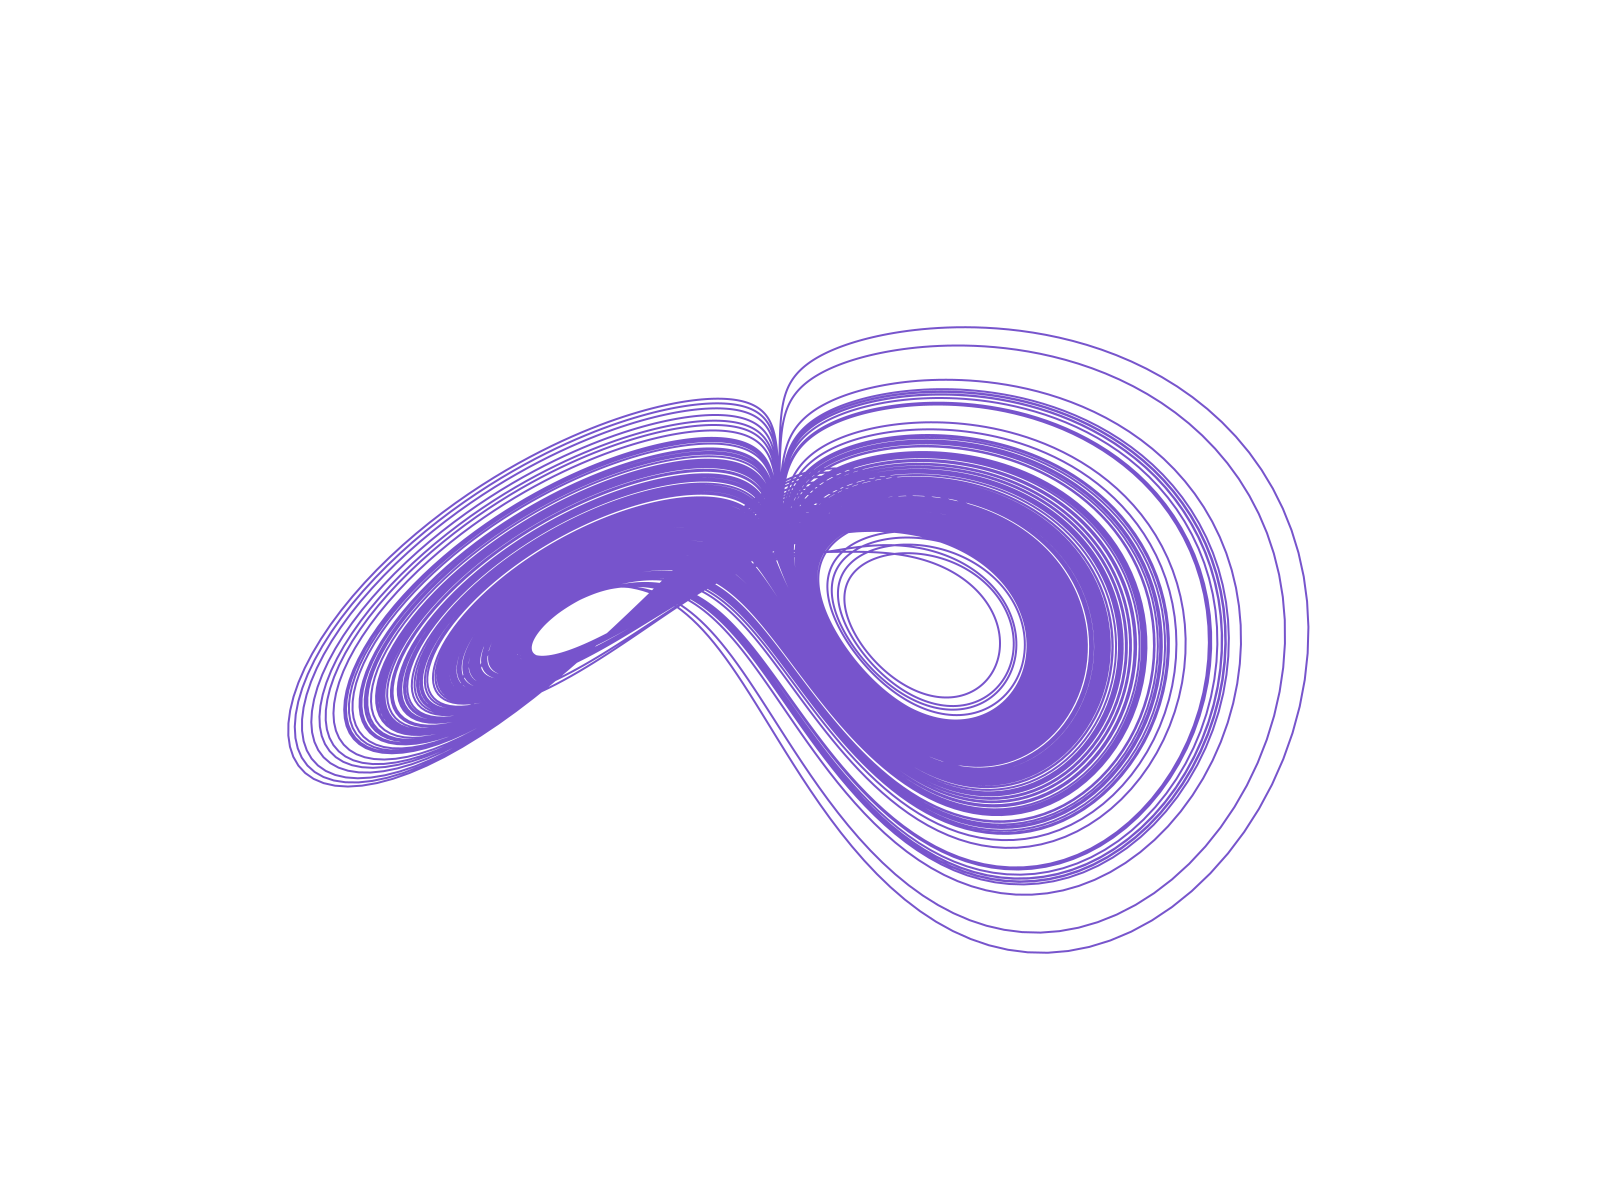

In [ ]:
using CairoMakie

ds = CoupledODEs(rikitake_rule, SVector(1, 0, 0.6), pmax)
X, t = trajectory(ds, 1000.0; Ttr = 10, Δt = 0.01)
fig, ax = lines(vec(X);
    linewidth = 1.0, color = "#7754cc",
    axis = (type = Axis3,), figure = (size = (800, 600), backgroundcolor = :transparent)
)
ax.azimuth = 2.1
hidedecorations!(ax)
hidespines!(ax)
fig